In [1]:
#importing packages
import pandas as pd
import numpy as np

In [2]:
X = pd.read_csv('HealtyNormalized.csv')
# Importing the dataset
X['Fault'] = 0

y = pd.read_csv('combinedFault.csv')
y['Fault'] = 1


In [3]:
X.head(), y.head()

(        vsH       vbH  Fault
 0  0.000998 -0.000217      0
 1  0.001001 -0.000185      0
 2  0.001002 -0.000152      0
 3  0.001007 -0.000185      0
 4  0.001010 -0.000217      0,
         vsC       vbC  Fault
 0  0.039634  0.018847      1
 1  0.039634  0.018847      1
 2  0.039634  0.018518      1
 3  3.632150  0.015887      1
 4  4.148328  0.018518      1)

In [4]:
X = X.rename(columns={"vsH": "speed", "vbH": "vibration"})
y = y.rename(columns={"vsC": "speed", "vbC": "vibration"})

In [5]:
X.head(), y.head()

(      speed  vibration  Fault
 0  0.000998  -0.000217      0
 1  0.001001  -0.000185      0
 2  0.001002  -0.000152      0
 3  0.001007  -0.000185      0
 4  0.001010  -0.000217      0,
       speed  vibration  Fault
 0  0.039634   0.018847      1
 1  0.039634   0.018847      1
 2  0.039634   0.018518      1
 3  3.632150   0.015887      1
 4  4.148328   0.018518      1)

In [6]:
import seaborn as sb 
from pylab import rcParams

In [7]:
"""

%matplotlib inline
rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')
plt.rcParams['agg.path.chunksize'] = 20000000
"""

"\n\n%matplotlib inline\nrcParams['figure.figsize'] = 5,4\nsb.set_style('whitegrid')\nplt.rcParams['agg.path.chunksize'] = 20000000\n"

C:\Users\bahma\.conda\envs\svm\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vibration'>

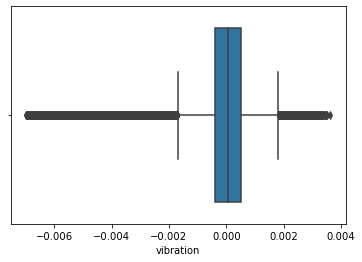

In [7]:
sb.boxplot(X['vibration'])

In [8]:
def find_normal_boundaries(df, variable):    
    # calculate the boundaries outside which lie the outliers for a Gaussian distribution    
    upper_boundary = df[variable].mean() + 10 * df[variable].std()
    lower_boundary = df[variable].mean() - 10 * df[variable].std()    
    return upper_boundary, lower_boundary


In [9]:
upper_boundary, lower_boundary = find_normal_boundaries(X, 'vibration')
print(upper_boundary, lower_boundary)

0.0071039730976409105 -0.0070003626852839


C:\Users\bahma\.conda\envs\svm\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vibration'>

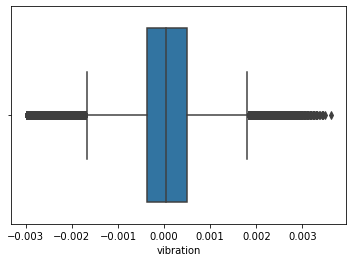

In [10]:
upper_boundary = 0.007
lower_boundary = -0.003

data2 = X[(X['vibration']<upper_boundary) & (X['vibration']>lower_boundary)]

X = data2
X.describe()

sb.boxplot(X['vibration'])

C:\Users\bahma\.conda\envs\svm\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vibration'>

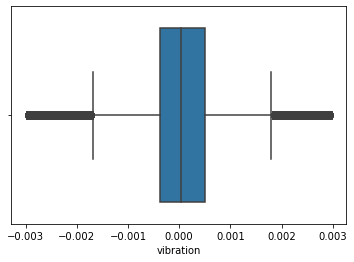

In [11]:
upper_boundary = 0.003
lower_boundary = -0.003

data2 = X[(X['vibration']<upper_boundary) & (X['vibration']>lower_boundary)]

X = data2
X.describe()

sb.boxplot(X['vibration'])

C:\Users\bahma\.conda\envs\svm\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vibration'>

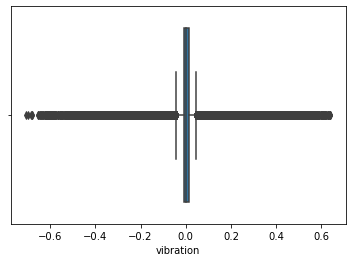

In [12]:
sb.boxplot(y['vibration'])

In [13]:
upper_boundary, lower_boundary = find_normal_boundaries(y, 'vibration')
print(upper_boundary, lower_boundary)

0.3326969678558227 -0.3299069979161344


C:\Users\bahma\.conda\envs\svm\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vibration'>

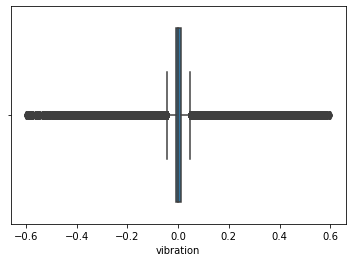

In [14]:
upper_boundary = 0.6
lower_boundary = -0.6

data2 = y[(y['vibration']<upper_boundary) & (y['vibration']>lower_boundary)]

y = data2
y.describe()

sb.boxplot(y['vibration'])

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 0)

y_train, y_test = train_test_split(y, test_size = 0.2, random_state = 0)

In [23]:
X_train.shape , y_train.shape 

((1598123, 3), (1511346, 3))

In [22]:
train = X_train.append(y_train)
train

,speed,vibration,Fault
1361846,0.000009,0.000530,0
667065,0.000964,0.000595,0
460028,0.000009,0.001018,0
672935,0.000009,-0.000478,0
312581,0.001005,0.000043,0
...,...,...,...
152315,4.231508,0.008324,1
963398,0.039634,0.023451,1
117952,0.041935,-0.019957,1
1484420,0.039305,0.007666,1


In [25]:
#shuffling dataset
train = train.sample(frac = 1)
train

,speed,vibration,Fault
1093107,4.210138,-0.029823,1
307755,0.000009,-0.000413,0
1234155,0.001003,-0.000315,0
1588545,4.045092,0.019504,1
1911755,0.000009,-0.002071,0
...,...,...,...
128065,0.039634,0.016216,1
271066,0.001004,0.000270,0
1195897,0.039634,-0.001871,1
72364,0.000009,0.000986,0


In [27]:
test = X_test.append(y_test)
test

,speed,vibration,Fault
1456698,0.000009,-0.000575,0
1704724,0.000009,-0.000022,0
850351,0.000990,0.000465,0
1821345,0.001003,0.001083,0
892141,0.000009,-0.000055,0
...,...,...,...
961532,4.250577,-0.017984,1
1653407,0.039634,0.034303,1
1122248,0.039305,-0.110061,1
856569,0.040291,-0.021273,1


In [28]:
test= test.sample(frac = 1)
test

,speed,vibration,Fault
371271,4.212439,0.004049,1
1819129,0.000997,0.000758,0
1233001,0.000009,-0.000608,0
457294,0.001001,0.000498,0
844227,0.038318,-0.014367,1
...,...,...,...
1272490,4.208822,0.006679,1
50709,0.031743,-0.003186,1
903192,0.001011,-0.001193,0
1157851,0.039305,0.087576,1


In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train = pd.DataFrame(scaler.fit_transform(train))
train.sample(frac=1)

test = pd.DataFrame(scaler.transform(test))

In [30]:
train

,0,1,2
0,0.983412,0.475055,1.0
1,0.000007,0.499571,0.0
2,0.000239,0.499652,0.0
3,0.944861,0.516173,1.0
4,0.000007,0.498188,0.0
...,...,...,...
3109464,0.009262,0.513432,1.0
3109465,0.000239,0.500140,0.0
3109466,0.009262,0.498355,1.0
3109467,0.000007,0.500736,0.0


In [31]:
train.shape

(3109469, 3)

In [32]:
test.shape

(777368, 3)

In [33]:
train = train.values.reshape(-1, 1, 3)

In [34]:
test  = test.values.reshape(-1, 1, 3)

In [35]:
#pip install keras
train.shape

(3109469, 1, 3)

In [36]:
test.shape

(777368, 1, 3)

In [37]:
from keras.layers import Input, Dropout, Dense, LSTM, RepeatVector, TimeDistributed
from keras.models import Model, Sequential, load_model
from keras import regularizers

In [38]:
# Input layer:
model=Sequential([
    LSTM(32, activation='relu', input_shape=(train.shape[1],train.shape[2])),
    Dropout(0.2),
    RepeatVector(train.shape[1]),
    LSTM(32, activation='relu', return_sequences=True),
    Dropout(0.2),
    TimeDistributed(Dense(train.shape[2]))
])

model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32)                4608      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
repeat_vector (RepeatVector) (None, 1, 32)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 32)             8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 32)             0         
_________________________________________________________________
time_distributed (TimeDistri (None, 1, 3)              99        
Total params: 13,027
Trainable params: 13,027
Non-trainable params: 0
____________________________________________________

In [39]:
# Train model for 100 epochs, batch size of 1000: 
NUM_EPOCHS=100
BATCH_SIZE=1000

history=model.fit(train,train, 
                  batch_size=BATCH_SIZE, 
                  epochs=NUM_EPOCHS,
                  validation_split=0.1,
                  shuffle=True)

Epoch 1/100
2799/2799 [==============================] - 12s 4ms/step - loss: 0.0178 - accuracy: 0.8995 - val_loss: 2.6946e-04 - val_accuracy: 0.9997
Epoch 2/100
2799/2799 [==============================] - 12s 4ms/step - loss: 0.0040 - accuracy: 0.9237 - val_loss: 2.1132e-04 - val_accuracy: 0.9997
Epoch 3/100
2799/2799 [==============================] - 12s 4ms/step - loss: 0.0037 - accuracy: 0.9249 - val_loss: 1.6666e-04 - val_accuracy: 0.9997
Epoch 4/100
2799/2799 [==============================] - 12s 4ms/step - loss: 0.0037 - accuracy: 0.9264 - val_loss: 1.6494e-04 - val_accuracy: 0.9997
Epoch 5/100
2799/2799 [==============================] - 12s 4ms/step - loss: 0.0037 - accuracy: 0.9267 - val_loss: 1.7796e-04 - val_accuracy: 0.9997
Epoch 6/100
2799/2799 [==============================] - 14s 5ms/step - loss: 0.0036 - accuracy: 0.9264 - val_loss: 1.6085e-04 - val_accuracy: 0.9997
Epoch 7/100
2799/2799 [==============================] - 16s 6ms/step - loss: 0.0036 - accuracy: 0.9

2799/2799 [==============================] - 14s 5ms/step - loss: 0.0036 - accuracy: 0.9266 - val_loss: 2.0136e-04 - val_accuracy: 0.9997
Epoch 56/100
2799/2799 [==============================] - 12s 4ms/step - loss: 0.0036 - accuracy: 0.9266 - val_loss: 2.2046e-04 - val_accuracy: 0.9997
Epoch 57/100
2799/2799 [==============================] - 12s 4ms/step - loss: 0.0036 - accuracy: 0.9264 - val_loss: 2.2819e-04 - val_accuracy: 0.9997
Epoch 58/100
2799/2799 [==============================] - 12s 4ms/step - loss: 0.0036 - accuracy: 0.9265 - val_loss: 2.2199e-04 - val_accuracy: 0.9997
Epoch 59/100
2799/2799 [==============================] - 12s 4ms/step - loss: 0.0036 - accuracy: 0.9265 - val_loss: 1.9288e-04 - val_accuracy: 0.9997
Epoch 60/100
2799/2799 [==============================] - 12s 4ms/step - loss: 0.0036 - accuracy: 0.9266 - val_loss: 2.4938e-04 - val_accuracy: 0.9997
Epoch 61/100
2799/2799 [==============================] - 12s 4ms/step - loss: 0.0036 - accuracy: 0.9268 - 

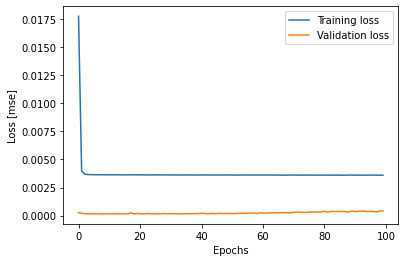

In [40]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss [mse]')
plt.show()

In [41]:
pred_train = model.predict(train)

In [42]:
pred_train = pred_train.reshape(pred_train.shape[0],pred_train.shape[2])
train = train.reshape(train.shape[0],train.shape[2])

C:\Users\bahma\.conda\envs\svm\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


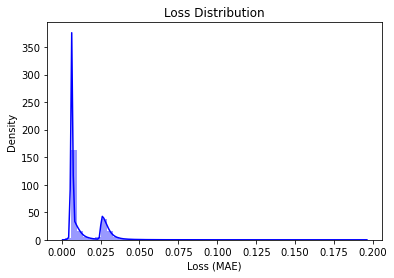

In [43]:
import seaborn as sns

scored = np.mean(np.abs(pred_train-train), axis = 1)
plt.figure()
g = sns.distplot(scored, bins = 50, kde= True, color = 'blue');
plt.title('Loss Distribution')
plt.xlabel('Loss (MAE)')
plt.show()

In [47]:
TH = 0.1
pred_train = pd.DataFrame(pred_train)
scored_train = pd.DataFrame()
scored_train['Loss_mae'] = np.mean(np.abs(pred_train-train), axis = 1)
scored_train['Threshold'] = TH
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']

In [48]:
scored_train['Loss_mae'].mean()

0.01365534676062818

Text(0, 0.5, 'Loss (MAE)')

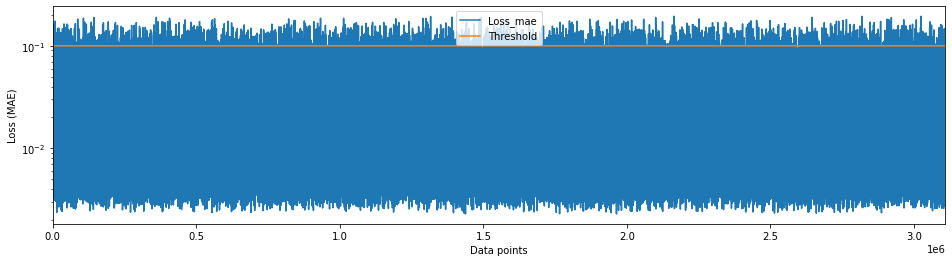

In [49]:
scored_train.plot(logy=True,  figsize = (16,4), xlim =[0,len(scored_train)])
plt.xlabel('Data points')
plt.ylabel('Loss (MAE)')

In [50]:
scored_train

,Loss_mae,Threshold,Anomaly
0,0.015016,0.1,False
1,0.006583,0.1,False
2,0.006477,0.1,False
3,0.009519,0.1,False
4,0.007044,0.1,False
...,...,...,...
3109464,0.029366,0.1,False
3109465,0.006314,0.1,False
3109466,0.025654,0.1,False
3109467,0.006541,0.1,False


In [51]:
anomalies = scored_train[scored_train['Anomaly'] == True]
print(anomalies)
print(anomalies.shape)

         Loss_mae  Threshold  Anomaly
1212     0.141392        0.1     True
1624     0.159931        0.1     True
1898     0.100572        0.1     True
2493     0.156053        0.1     True
5535     0.114584        0.1     True
...           ...        ...      ...
3100762  0.102915        0.1     True
3103558  0.100890        0.1     True
3104841  0.120915        0.1     True
3108039  0.148330        0.1     True
3108520  0.121549        0.1     True

[2283 rows x 3 columns]
(2283, 3)


C:\Users\bahma\.conda\envs\svm\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


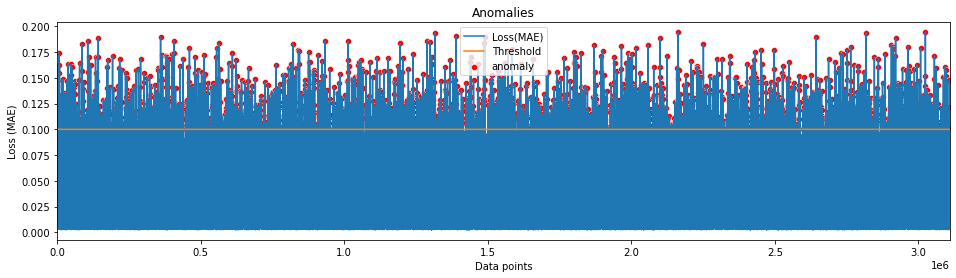

In [52]:
f, (ax1) = plt.subplots(figsize=(16, 4))
ax1.plot(scored_train.index, scored_train.Loss_mae, label='Loss(MAE)');
ax1.plot(scored_train.index, scored_train.Threshold, label='Threshold')
g = sns.scatterplot(x=anomalies.index , y=anomalies.Loss_mae, label='anomaly', color='red')
g.set(xlim = (0, len(scored_train.index)))
plt.title('Anomalies')
plt.xlabel('Data points')
plt.ylabel('Loss (MAE)')
plt.legend();

In [53]:
pred_test = model.predict(test)

In [54]:
score = model.evaluate(test,test)
score

24293/24293 [==============================] - 20s 825us/step - loss: 4.2371e-04 - accuracy: 0.9998


[0.00042370992014184594, 0.9997555613517761]

In [55]:
pred_test = pred_test.reshape(pred_test.shape[0],pred_test.shape[2])
test = test.reshape(test.shape[0],test.shape[2])

C:\Users\bahma\.conda\envs\svm\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


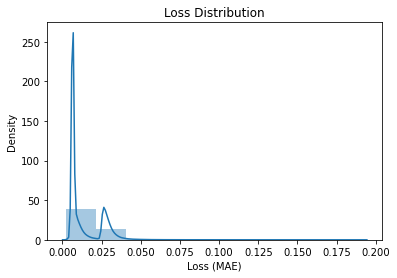

In [56]:
import seaborn as sns

scored_test = np.mean(np.abs(pred_test-test), axis = 1)
plt.figure()
g = sns.distplot(scored_test, bins = 10, kde= True);
plt.title('Loss Distribution')
plt.xlabel('Loss (MAE)')
plt.show()

In [57]:
scored_test = pd.DataFrame()
scored_test['Loss_mae'] = np.mean(np.abs(pred_test-test), axis = 1)
scored_test['Threshold'] = TH
scored_test['Anomaly'] = scored_test['Loss_mae'] > scored_test['Threshold']

scored_test

,Loss_mae,Threshold,Anomaly
0,0.007794,0.1,False
1,0.006400,0.1,False
2,0.006637,0.1,False
3,0.006327,0.1,False
4,0.029186,0.1,False
...,...,...,...
777363,0.008468,0.1,False
777364,0.026118,0.1,False
777365,0.006721,0.1,False
777366,0.048948,0.1,False


In [58]:
scored_test['Loss_mae'].mean()

0.013650448771261977

Text(0, 0.5, 'Loss (MAE)')

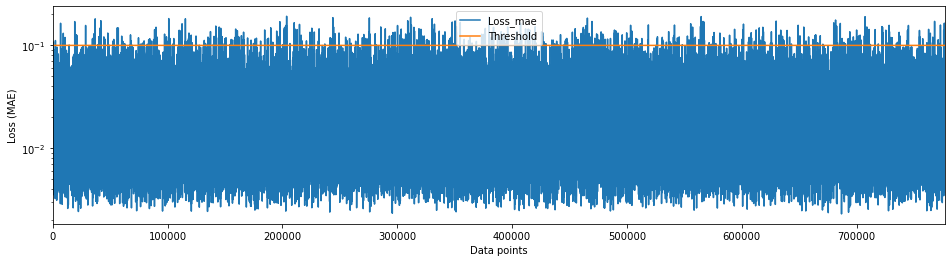

In [59]:
scored_test.plot(logy=True,  figsize = (16,4), xlim =[0,len(scored_test)])
plt.xlabel('Data points')
plt.ylabel('Loss (MAE)')

In [60]:
IR_anomalies = scored_test[scored_test['Anomaly'] == True]
print(IR_anomalies)
print(IR_anomalies.shape)

        Loss_mae  Threshold  Anomaly
524     0.103372        0.1     True
530     0.107806        0.1     True
2389    0.111426        0.1     True
6869    0.164179        0.1     True
6884    0.117680        0.1     True
...          ...        ...      ...
771797  0.104279        0.1     True
772967  0.157855        0.1     True
775808  0.140259        0.1     True
776344  0.164570        0.1     True
776559  0.114300        0.1     True

[553 rows x 3 columns]
(553, 3)


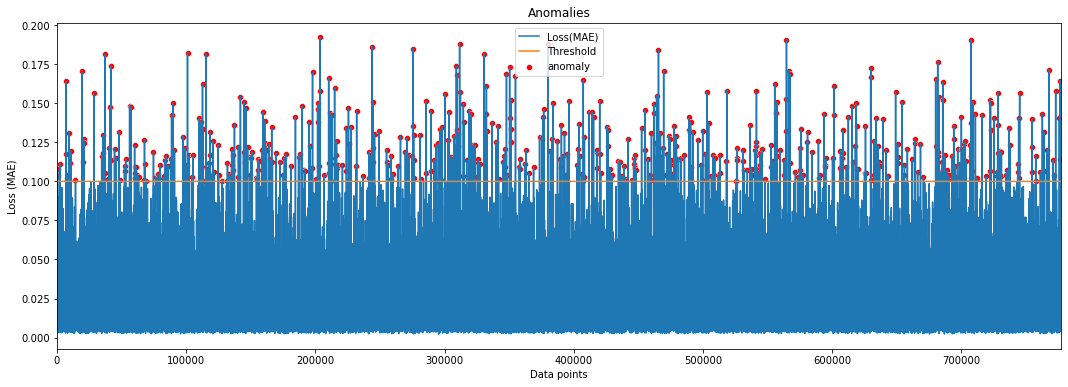

In [61]:
f, (ax2) = plt.subplots(figsize=(18, 6))
ax2.plot(scored_test.index, scored_test.Loss_mae, label='Loss(MAE)');
ax2.plot(scored_test.index, scored_test.Threshold, label='Threshold')
g = sns.scatterplot(x=IR_anomalies.index , y=IR_anomalies.Loss_mae, label='anomaly', color='red')
g.set(xlim = (0, len(scored_test.index)))
plt.title('Anomalies')
plt.xlabel('Data points')
plt.ylabel('Loss (MAE)')
plt.legend();

In [62]:
print(score[1])

0.9997555613517761


In [63]:
print("Accuracy: {:.2f}%".format(score[1]*100))

Accuracy: 99.98%


In [64]:
print("Anomalies: {}".format(IR_anomalies['Anomaly'].count()))

Anomalies: 553


In [65]:
# Seperating Normal and Faulty dataset
x = scored_test['Anomaly'].count() / 2

In [66]:
normal_test = scored_test[scored_test.index < x]
normal_test

,Loss_mae,Threshold,Anomaly
0,0.007794,0.1,False
1,0.006400,0.1,False
2,0.006637,0.1,False
3,0.006327,0.1,False
4,0.029186,0.1,False
...,...,...,...
388679,0.006574,0.1,False
388680,0.008606,0.1,False
388681,0.006397,0.1,False
388682,0.026848,0.1,False


In [67]:
IR_test = scored_test[scored_test.index >= x]
IR_test

,Loss_mae,Threshold,Anomaly
388684,0.006567,0.1,False
388685,0.029558,0.1,False
388686,0.006511,0.1,False
388687,0.006550,0.1,False
388688,0.008439,0.1,False
...,...,...,...
777363,0.008468,0.1,False
777364,0.026118,0.1,False
777365,0.006721,0.1,False
777366,0.048948,0.1,False


In [68]:
TP = normal_test[normal_test['Anomaly'] == False]
TP = TP['Anomaly'].count()
print("True Positives: {}".format(TP))

FP = normal_test[normal_test['Anomaly'] == True]
FP = FP['Anomaly'].count()
print("False Positives: {}".format(FP))

TN = IR_test[IR_test['Anomaly'] == True]
TN = TN['Anomaly'].count()
print("True Negatives: {}".format(TN))

FN = IR_test[IR_test['Anomaly'] == False]
FN = FN['Anomaly'].count()
print("False Negatives: {}".format(FN))

True Positives: 388410
False Positives: 274
True Negatives: 279
False Negatives: 388405


In [69]:
Precision = TP / (TP + FP)
print("Precision: {:.2f}%".format(Precision*100))

Recall = TP / (TP + FN)
print("Recall: {:.3f}%".format(Recall*100))

F1Score = (2*Precision*Recall)/(Precision+Recall)
print("F1 Score: {:.2f}%".format(F1Score*100))

Accuracy = ( TP + TN ) / ( TP + TN + FN + FP )
print("Accuracy: {:.2f}%".format(Accuracy*100))

Precision: 99.93%
Recall: 50.000%
F1 Score: 66.65%
Accuracy: 50.00%
